In [3]:
# fetching thee data from the mnist 
from keras.datasets import mnist
(train_x,train_y),(test_x,test_y)=mnist.load_data()
# showing the shape
print("x_train:"+str(train_x.shape))
print("y-train:"+str(train_y.shape))
print("x_test:"+str(test_x.shape))
print("y_test:"+str(test_y.shape))

2025-11-14 09:09:59.086376: I external/local_xla/xla/tsl/cuda/cudart_stub.cc:31] Could not find cuda drivers on your machine, GPU will not be used.
2025-11-14 09:09:59.092712: I tensorflow/core/util/port.cc:153] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.
2025-11-14 09:09:59.551292: I tensorflow/core/platform/cpu_feature_guard.cc:210] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 AVX_VNNI FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2025-11-14 09:10:01.174918: I tensorflow/core/util/port.cc:153] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off,

x_train:(60000, 28, 28)
y-train:(60000,)
x_test:(10000, 28, 28)
y_test:(10000,)


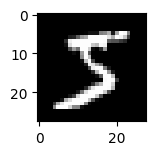

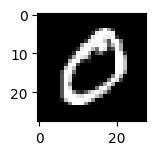

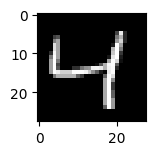

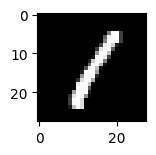

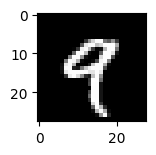

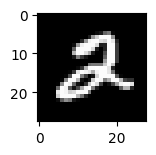

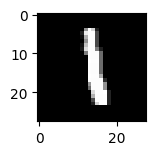

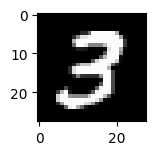

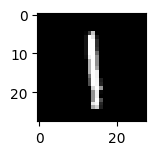

In [4]:
# plotting the dataset
from matplotlib import pyplot as plt
for i in range(9):
    plt.subplot(330+1+i)
    plt.imshow(train_x[i],cmap=plt.get_cmap('gray'))
    plt.show()



In [5]:
# trianing the binary classifier first 
# binary means which can only calssufy to two calsses like true ir false 

In [6]:
train_x_flat = train_x.reshape(train_x.shape[0], -1)
test_x_flat  = test_x.reshape(test_x.shape[0], -1)

In [7]:
y_train_5=(train_y==5)
y_test_5=(test_y==5)

In [8]:
print(y_train_5)
print(y_train_5.shape)

[ True False False ...  True False False]
(60000,)


In [9]:
print(y_test_5)
print(train_x_flat.shape)

[False False False ... False  True False]
(60000, 784)


In [10]:
# importing models SGd
from sklearn.linear_model  import SGDClassifier
clf=SGDClassifier()
clf.fit(train_x_flat,y_train_5)



,loss,'hinge'
,penalty,'l2'
,alpha,0.0001
,l1_ratio,0.15
,fit_intercept,True
,max_iter,1000
,tol,0.001
,shuffle,True
,verbose,0
,epsilon,0.1
,n_jobs,None


In [11]:
# getting some random test set
import numpy as np
random_index=np.random.randint(0,len(test_x))
image = test_x[random_index]
label = test_y[random_index]
# lableing 
print("Label:", label)
print("Image shape:", image.shape)

Label: 7
Image shape: (28, 28)


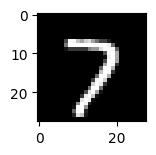

In [12]:
# ploting the image
from matplotlib import pyplot
plt.subplot(3,3,1)
plt.imshow(image,cmap=plt.get_cmap('gray'))
plt.show()

In [13]:
image_plt=image.reshape(1,-1)
clf.predict(image_plt)

array([False])

In [14]:
# cross validation 
# for the 
from sklearn.model_selection import cross_val_score
cross_val_score(clf,train_x_flat,y_train_5,cv=3,scoring="accuracy")

array([0.9659 , 0.96795, 0.9679 ])

In [15]:
cross_val_score(clf,train_x_flat,y_train_5,cv=3,scoring="f1")

array([0.81853054, 0.76682927, 0.76117004])

In [16]:
# only accuracy is not the way to measure the perfomance in imbalanced class so confusion matris is needed

# but we need to ahve the predictions score
# so
from sklearn.model_selection import cross_val_predict
y_predicted=cross_val_predict(clf,train_x_flat,y_train_5,cv=3)

In [18]:
print(y_predicted)

[False False False ...  True False False]


In [21]:
# now confution matrix
from sklearn.metrics import confusion_matrix
confusion_matrix(y_train_5,y_predicted)

array([[54132,   447],
       [ 1638,  3783]])

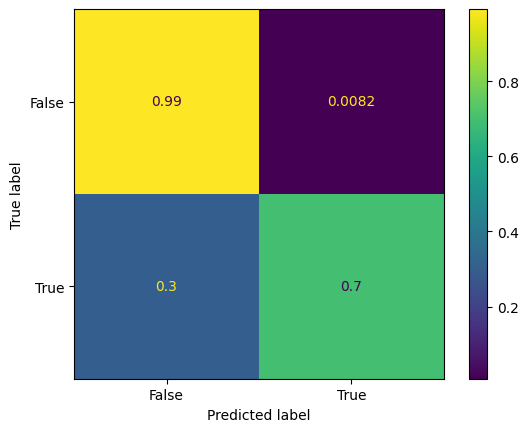

In [27]:
# saving the confusion matrices
from sklearn.metrics import ConfusionMatrixDisplay
disp = ConfusionMatrixDisplay.from_predictions(y_train_5, y_predicted, normalize='true')
disp.figure_.savefig("confusion_matrix.png")
